In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Breast Cancer.xlsx')

In [3]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#Dependant variable - 2 for Benign and 4 for Malignant
df['Class'].unique()

array([2, 4])

In [ ]:
X = df[['Clump Thickness','Uniformity of Cell Size',
            'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
            'Bare Nuclei','Bland Chromatin','Normal Nucleoli']]
y = df['Class']  

In [5]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.transform(df.drop('Class',axis = 1))

In [17]:
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,-0.123324,0.198275,-0.703754,-0.743267,-0.640673,-0.556471,-0.699868,-0.184911,-0.613856,-0.348114
1,-0.118613,0.198275,0.274636,0.260143,0.757159,1.695755,1.773373,-0.184911,-0.285827,-0.348114
2,-0.098477,-0.511779,-0.703754,-0.743267,-0.640673,-0.556471,-0.425063,-0.184911,-0.613856,-0.348114
3,-0.097102,0.553303,1.579155,1.598024,-0.640673,-0.106026,0.124546,-0.184911,1.354321,-0.348114
4,-0.095898,-0.156752,-0.703754,-0.743267,0.058243,-0.556471,-0.699868,-0.184911,-0.613856,-0.348114


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class'],
                                                    test_size=0.30)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
pred = knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          2       0.97      0.97      0.97       130
          4       0.95      0.95      0.95        76

avg / total       0.96      0.96      0.96       206

[[126   4]
 [  4  72]]


In [40]:
#Choosing K
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,u'Error Rate')

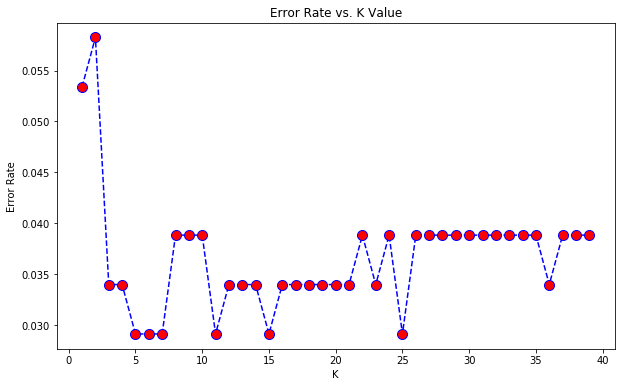

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [45]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30


[[126   4]
 [  2  74]]


             precision    recall  f1-score   support

          2       0.98      0.97      0.98       130
          4       0.95      0.97      0.96        76

avg / total       0.97      0.97      0.97       206

